<a href="https://colab.research.google.com/github/avrogachev/privateGPT/blob/main/ods_nlp_course_s02_LogReg%2C_TFiDF%2C_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ODS NLP Cource: Seminar 02 - LogReg, TFiDF, Классификация

# [1] Базовые библиотеки (перенесены в 1 семинар)


# [2] Линейные модели

## [2.1] Задача регрессии: Линейная регрессия

### [2.1.1] Постановка задачи

Давайте предскажем поведение линейной функции
$$y = 2x_1 + 5x_2 - 3$$

Линейное уравнение от нескольких переменных для $k$-того наблюдения будет выглядеть следующим образом:
$$y^{[k]} = x^{[k]}_1 \cdot w_1 + \dots + x^{[k]}_m \cdot w_m + b$$

это же уравнение в векторной форме через **скалярное произведение**:
$$y^{[k]} = {\bf x}^{[k]} \cdot {\bf w} + b$$

это же уравнение в матричной форме через **матричное произведение**:
$$y^{[k]} = X^{[k]}_{[1;\ m]} \times W_{[m;\ 1]} + b$$

это же уравнение при обобщении до всех $\bf*$ наблюдений причём по $t$ различным таргетам:
$${Y}_{[*;\ t]} = {X}_{[*;\ m]} \times {W}_{[m;\ t]} + {b}_{[*;\ t]}$$

In [ ]:
import numpy as np

In [ ]:
# заданные параметры
W_true = [[2], [5]]
b_true = [[-3]]

# сгенерированные наблюдения
np.random.seed(42)
X = np.random.randint(low=-20, high=20, size=(20, len(W_true))) + 0.0
y = X @ W_true + b_true
X.T, y.T

(array([[ 18.,  -6.,   0.,  -2., -10.,   3.,  19., -18., -19.,   9., -19.,
          12.,   1.,   6.,  -5., -18., -14., -12.,  -3.,   4.],
        [  8., -13.,  18.,   2., -10.,  15.,   3.,   1.,   3.,  17.,   0.,
          -9.,   4.,   7.,  -6.,  16.,   0.,  18., -17.,  -7.]]),
 array([[ 73., -80.,  87.,   3., -73.,  78.,  50., -34., -26., 100., -41.,
         -24.,  19.,  44., -43.,  41., -31.,  63., -94., -30.]]))

Взятие производной для
$$\frac{\Delta L}{\Delta p} ≈
\frac{\partial L}{\partial p} =
\frac{\partial L}{\partial \bar{y}}
\frac{\partial \bar{y}}{\partial p} =
L^{'}_{\bar{y}} \cdot \frac{\partial \bar{y}}{\partial p}
$$

Производные параметров
$$\begin{align}
\frac{\partial L}{\partial b} &= L^{'}_\bar{y} \cdot 1 \\
\frac{\partial L}{\partial w_i} &= L^{'}_{\bar{y}} \cdot x_i
\end{align}$$

Матричные производные:
$$\begin{align}
\frac{\partial L}{\partial b}_{[*;\ t]} &= {L^{'}_\bar{Y}}_{[*;\ t]}\\
\frac{\partial L}{\partial W}_{[m;\ t]} &= X^T_{[m;\ *]} \times {L^{'}_\bar{Y}}_{[*;\ t]}
\end{align}$$




In [ ]:
def equation(w=np.array([2, 5]), b=np.array(3)):
    return 'y = ' + ' + '.join(f'{w[i].item():.2f}*x{i+1}' for i in range(len(w))) + f' + {b.item():.2f}'
equation()

'y = 2.00*x1 + 5.00*x2 + 3.00'

### [2.1.2] NumPy решение

In [ ]:
# сгенерированные данные
np.random.seed(42)
W_true = np.array([[2], [5]])
b_true = -3
X = np.random.randint(-20, 20, (20, len(W_true))) + 0.0
y = X @ W_true + b_true

def np_train(X, y, lr=0.005, max_iter=1000):
    # предсказываемые параметры
    W = np.zeros((X.shape[-1], y.shape[-1]))
    b = np.zeros((1, y.shape[-1]))

    for i in range(1, max_iter+1):
        # предсказание и ошибка
        y_pred = X @ W + b
        loss = np.sum((y_pred - y) ** 2) / len(y)

        # расчёт градиентов
        L_grad = (2/len(y)) * (y_pred - y)
        b_grad = np.sum(L_grad)
        W_grad = np.sum(X.T @ L_grad, axis=1, keepdims=True)

        # шаг градиента
        W -= lr * W_grad
        b -= lr * b_grad

        # прогресс
        if i == 1 or i % 100 == 0:
            print(f"step {i:3}:", equation(W, b), f"loss: {loss.item():.6f}", sep='\t')

np_train(X, y)

step   1:	y = 2.90*x1 + 5.65*x2 + 0.04	loss: 3390.100000
step 100:	y = 2.02*x1 + 4.97*x2 + -1.75	loss: 1.423337
step 200:	y = 2.01*x1 + 4.99*x2 + -2.49	loss: 0.236051
step 300:	y = 2.00*x1 + 5.00*x2 + -2.79	loss: 0.039147
step 400:	y = 2.00*x1 + 5.00*x2 + -2.92	loss: 0.006492
step 500:	y = 2.00*x1 + 5.00*x2 + -2.97	loss: 0.001077
step 600:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000179
step 700:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000030
step 800:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000005
step 900:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000001
step 1000:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000000


### [2.1.3] Torch решение

In [ ]:
import torch

In [ ]:
# сгенерированные данные
X = torch.tensor(X).to(torch.float32)
y = X @ W_true + b_true

def torch_train(X, y, lr=0.005, max_iter=1000):
    # предсказываемые параметры
    W = torch.zeros(X.shape[1], y.shape[1], requires_grad=True)
    b = torch.zeros(y.shape[1], requires_grad=True)

    for i in range(1, max_iter+1):
        # предсказание и ошибка
        y_pred = X @ W + b
        loss = torch.mean((y_pred - y) ** 2)

        # расчёт градиентов
        loss.backward()

        with torch.no_grad():
            # шаг градиента
            W -= lr * W.grad
            b -= lr * b.grad

            # обнуление накопленного градиента (inplace)
            W.grad.zero_()
            b.grad.zero_()

        # прогресс
        if i == 1 or i % 100 == 0:
            print(f"step {i:3}:", equation(W, b), f"loss: {loss.item():.6f}", sep='\t')

torch_train(X, y)

step   1:	y = 2.90*x1 + 5.64*x2 + 0.04	loss: 3390.100000
step 100:	y = 2.02*x1 + 4.97*x2 + -1.75	loss: 1.423338
step 200:	y = 2.01*x1 + 4.99*x2 + -2.49	loss: 0.236050
step 300:	y = 2.00*x1 + 5.00*x2 + -2.79	loss: 0.039148
step 400:	y = 2.00*x1 + 5.00*x2 + -2.92	loss: 0.006492
step 500:	y = 2.00*x1 + 5.00*x2 + -2.97	loss: 0.001077
step 600:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000179
step 700:	y = 2.00*x1 + 5.00*x2 + -2.99	loss: 0.000030
step 800:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000005
step 900:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000001
step 1000:	y = 2.00*x1 + 5.00*x2 + -3.00	loss: 0.000000


## [2.2] Задача классификации: Логистическая регрессия

### [2.2.1] Анализ данных

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


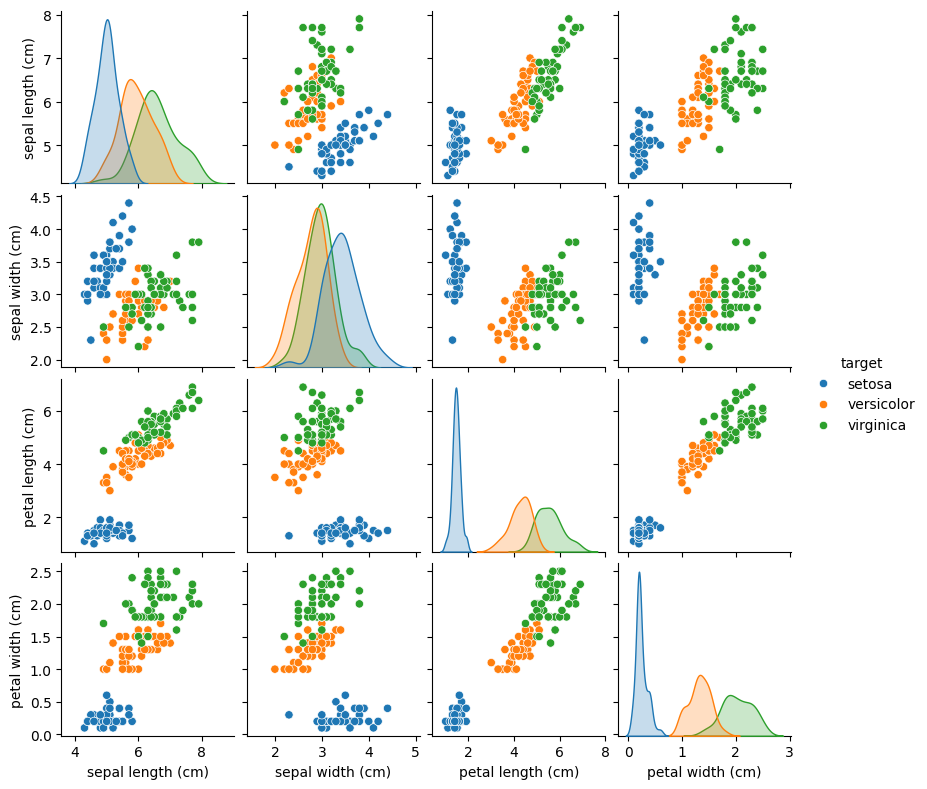

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='target', height=2)

### [2.2.2] Scikit-learn решение

In [ ]:
# from sklearn.model_selection import train_test_split

def train_test_split(*args, test_size=0.33, random_state=42) -> tuple[torch.Tensor]:
    torch.manual_seed(random_state)
    idx = torch.randperm(n := args[0].shape[0])
    test = round(n * test_size)
    return tuple(
        torch.Tensor(result)
        for arg in args
        for result in (arg[idx[:-test]], arg[idx[-test:]])
        )

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X[y != 2], y[y != 2][:, None])
y_train.T, y_test.T

(tensor([[0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
          1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
          1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.]]),
 tensor([[1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
          1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.]]))

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train.ravel())
equation(clf.coef_.T, clf.intercept_)

'y = 0.42*x1 + -0.90*x2 + 2.08*x3 + 0.86*x4 + -5.77'

### [2.2.3] Ручное Torch решение

Softmax для $t$ классов:
$$\begin{align}
\text{Softmax}(z_i) = \frac{e^{z_i}}{e^{z_1} + \dots + e^{z_t}} \\
\text{Softmax}(z_1) + \dots + \text{Softmax}(z_t) = 1
\end{align}$$

Softmax для 2 классов:
$$\text{Softmax}(z_1) = \frac{e^{z_1}}{e^{z_1} + e^{z_2}} = \frac{1}{1 + e^{z_2-z_1}}$$

Sigmoid:
$$\text{Sigmoid}(z) = \frac{1}{1 + e^{z}}$$

In [ ]:
class LogisticRegression2:
    def __init__(self): pass

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + torch.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(X @ self.W + self.b)

    def predict(self, X, threshold=0.5): # по классам
        with torch.no_grad():
            proba = self.predict_proba(torch.Tensor(X))
            return (proba > threshold).to(int)

    def score(self, X, y):
        return (self.predict(X_test) == y_test).to(float).mean().item()

    @staticmethod
    def loss(y_true, y_pred):
        return -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)).mean()

    def fit(self, X, y, lr=0.5, max_iter=1000):
        # предсказываемые параметры
        self.W = torch.ones(X.shape[1], y.shape[1], requires_grad=True)
        self.b = torch.zeros(y.shape[1], requires_grad=True)

        for i in range(1, max_iter+1):
            # предсказание и ошибка
            y_pred = self.predict_proba(X)
            loss = self.loss(y, y_pred)

            # расчёт градиентов
            loss.backward()

            with torch.no_grad():
                # шаг градиента
                self.W -= lr * self.W.grad
                self.b -= lr * self.b.grad

                # обнуление накопленного градиента (inplace)
                self.W.grad.zero_()
                self.b.grad.zero_()

            # прогресс
            if i == 1 or i % 1000 == 0:
                print(f"step {i:3}:", equation(self.W, self.b), f"loss: {loss.item():.4f}", f"acc: {self.score(X, y):.4f}", sep='\t')

clf2 = LogisticRegression2()
clf2.fit(X_train, y_train, max_iter=8000)

step   1:	y = -0.20*x1 + 0.16*x2 + 0.65*x3 + 0.94*x4 + -0.24	loss: 4.9028	acc: 0.4545
step 1000:	y = -0.82*x1 + -2.43*x2 + 3.99*x3 + 2.43*x4 + -0.61	loss: 0.0017	acc: 1.0000
step 2000:	y = -0.86*x1 + -2.77*x2 + 4.44*x3 + 2.65*x4 + -0.64	loss: 0.0009	acc: 1.0000
step 3000:	y = -0.89*x1 + -2.98*x2 + 4.71*x3 + 2.79*x4 + -0.66	loss: 0.0006	acc: 1.0000
step 4000:	y = -0.91*x1 + -3.13*x2 + 4.90*x3 + 2.89*x4 + -0.68	loss: 0.0005	acc: 1.0000
step 5000:	y = -0.92*x1 + -3.24*x2 + 5.05*x3 + 2.97*x4 + -0.69	loss: 0.0004	acc: 1.0000
step 6000:	y = -0.93*x1 + -3.34*x2 + 5.17*x3 + 3.04*x4 + -0.70	loss: 0.0003	acc: 1.0000
step 7000:	y = -0.94*x1 + -3.42*x2 + 5.28*x3 + 3.09*x4 + -0.71	loss: 0.0003	acc: 1.0000
step 8000:	y = -0.95*x1 + -3.49*x2 + 5.37*x3 + 3.14*x4 + -0.71	loss: 0.0002	acc: 1.0000


<Axes: >

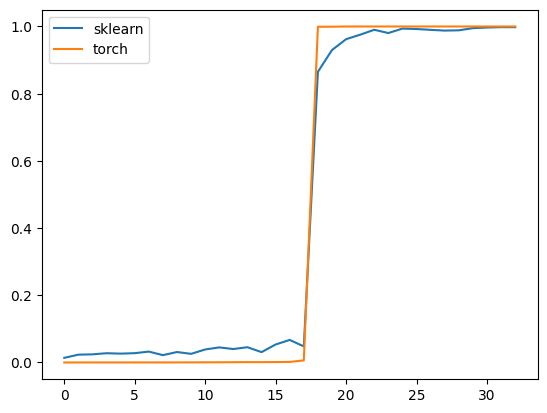

In [ ]:
df_pred = pd.DataFrame({
    "sklearn": clf.predict_proba(X_test)[:, 1],
    "torch": clf2.predict_proba(X_test)[:, 0].detach().numpy()
    })

df_pred.sort_values(by='torch').reset_index(drop=True).plot()

### [2.2.4] Torch пайплайн

In [ ]:
y_temp = (np.unique(y)[None, :] == y[:, None]) + 0.0
X_train, X_test, y_train, y_test = train_test_split(X, y_temp)

In [ ]:
class TorchLogisticRegression(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs=1):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=n_inputs, out_features=n_outputs)

    def forward(self, X):
        # return torch.sigmoid(self.linear(X), dim=1)
        return torch.softmax(self.linear(X), dim=1)

    def score(self, X, y):
        y_pred = torch.argmax(self(X), dim=1)
        y_true = torch.argmax(y, dim=1)
        return (y_true == y_pred).to(float).mean().item()

model = TorchLogisticRegression(X.shape[1], y_temp.shape[1])

In [ ]:
def torch_train(model, X, y, lr=0.005, max_iter=4000):
    # loss_function = torch.nn.BCELoss()
    loss_function = torch.nn.CrossEntropyLoss()

    # предсказываемые параметры
    optimizer = torch.optim.SGD(model.parameters(), lr)

    for i in range(1, max_iter+1):
        # предсказание и ошибка
        y_pred = model(X)
        loss = loss_function(y_pred, y)

        # расчёт градиентов
        loss.backward()

        # шаг градиента
        optimizer.step()
        # обнуление накопленного градиента
        optimizer.zero_grad()

        # прогресс
        if i == 1 or i % 1000 == 0:
            print(f"step {i:3}:", f"loss: {loss.item():.4f}", f"acc: {model.score(X, y):.2f}", sep='\t')

torch_train(model, X_train, y_train)
print('Test acc:', model.score(X_test, y_test))

step   1:	loss: 1.1873	acc: 0.29
step 1000:	loss: 0.8702	acc: 0.67
step 2000:	loss: 0.8113	acc: 0.81
step 3000:	loss: 0.7793	acc: 0.98
step 4000:	loss: 0.7558	acc: 0.99
Test acc: 0.92


# [3] Классикация текста

## [3.1] TF-iDF векторизация

### [3.1.1] Анализ данных

In [ ]:
# Скачаем демо-датасет
import nltk

nltk.download("movie_reviews", download_dir='movie_reviews')

[nltk_data] Downloading package movie_reviews to movie_reviews...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
# Cоберём корпус в DataFrame
from pathlib import Path
import pandas as pd

paths = list(Path('movie_reviews').glob('**/*.txt'))
df = pd.DataFrame([
    {'text': path.read_text("utf-8"),
     'label': path.parent.name}
    for path in paths
    ])
df.head()

,text,label
0,"in double jeopardy , the stakes are high . \nt...",neg
1,"well , here's a distasteful , thoroughly amate...",neg
2,"a sensuous romantic comedy , about as appealin...",neg
3,if i were to plot a graph of year against movi...,neg
4,* * * the following review contains some hars...,neg


In [ ]:
# train_test_split
partition = round(0.7 * len(df))
df_shuffled = df.sample(frac=1, random_state=42)

train_df = df_shuffled.iloc[:partition]
test_df = df_shuffled.iloc[partition:]

train_texts, train_labels = train_df['text'], train_df['label']
test_texts, test_labels = test_df['text'], test_df['label']

In [ ]:
# simple tokenizer
import re

def tokenize(texts, lower=True, token_pattern=r"(?i)\b[a-z]{2,}\b") -> pd.Series:
    texts = pd.Series(texts)
    if lower: texts = texts.str.lower()
    tokenizer = re.compile(token_pattern)
    return texts.apply(tokenizer.findall)

train_texts_tokenized = tokenize(train_texts)
train_texts_tokenized

1860    [sometimes, movie, comes, along, that, falls, ...
353     [do, the, folks, at, disney, have, no, common,...
1333    [footloose, has, only, one, goal, in, mind, to...
905     [there, have, been, merchant, ivory, costume, ...
1289    [billed, as, feminist, sex, fantasy, this, spi...
                              ...                        
1917    [not, since, shine, which, starred, geoffrey, ...
753     [it, would, be, hard, to, choose, the, best, a...
498     [everybody, in, this, film, thinking, of, alic...
1276    [there, was, lot, riding, on, this, movie, eve...
1325    [can, already, feel, the, hate, letters, pouri...
Name: text, Length: 1400, dtype: object

### [3.1.2] Ручное решение

In [ ]:
def word_counter(texts_tokenized) -> pd.DataFrame:
    term_counts = pd.DataFrame(columns=['doc', 'term', 'count'])

    for i, text_tokenized in enumerate(texts_tokenized):
        terms, counts = np.unique(text_tokenized, return_counts=True)
        df_counts = pd.DataFrame({'doc': i, 'term': terms, 'count': counts})
        term_counts = pd.concat([term_counts, df_counts], ignore_index=True)

    return term_counts

train_term_counts = word_counter(train_texts_tokenized)
train_term_counts

,doc,term,count
0,0,about,5
1,0,above,1
2,0,abstract,1
3,0,after,1
4,0,aimed,1
...,...,...,...
464024,1399,would,1
464025,1399,years,1
464026,1399,yes,2
464027,1399,you,7


$$\begin{align}
TF(t, d) &= \frac{\text{count of t in d}}{\text{count of all terms in d}} \\
IDF(t) &= \log \frac{\text{count of all docs}}{1+(\text{count of docs with t})} \\
TD\_IDF(t, d) &= TD(t, d) \cdot IDF(t)
\end{align}$$


In [ ]:
def get_tf_idf(term_counts: pd.DataFrame, smooth_idf=True) -> dict:
    term_counts = term_counts.copy()

    count_of_t_in_d = term_counts['count'].values
    count_of_terms_in_d = term_counts.groupby('doc').sum()['count'][term_counts['doc']].values
    term_counts['tf'] = count_of_t_in_d / count_of_terms_in_d

    count_of_all_docs = term_counts['doc'].nunique()
    count_of_docs_with_t = term_counts.groupby('term')['doc'].nunique()[term_counts['term']].values
    # term_counts['idf'] = np.log((count_of_all_docs) / (1 + count_of_docs_with_t))
    if smooth_idf:
        term_counts['idf'] = np.log((1 + count_of_all_docs) / (1 + count_of_docs_with_t)) + 1
    else:
        term_counts['idf'] = np.log((count_of_all_docs) / (count_of_docs_with_t)) + 1

    term_counts['tfidf'] = term_counts['tf'] * term_counts['idf']
    return term_counts

smooth_idf = False
train_tf_idf = get_tf_idf(train_term_counts, smooth_idf=smooth_idf)
train_tf_idf

,doc,term,count,tf,idf,tfidf
0,0,about,5,0.016234,1.300140,0.021106
1,0,above,1,0.003247,3.649108,0.011848
2,0,abstract,1,0.003247,6.164786,0.020016
3,0,after,1,0.003247,1.612226,0.005234
4,0,aimed,1,0.003247,5.025352,0.016316
...,...,...,...,...,...,...
464024,1399,would,1,0.001592,1.567144,0.002495
464025,1399,years,1,0.001592,2.211141,0.003521
464026,1399,yes,2,0.003185,3.181632,0.010133
464027,1399,you,7,0.011146,1.302071,0.014514


In [ ]:
# vocabulary = train_term_counts['term'].unique()
# vocabulary
tf_idf_transform = train_tf_idf.drop_duplicates('term').set_index('term')['idf']
tf_idf_transform

term
about            1.300140
above            3.649108
abstract         6.164786
after            1.612226
aimed            5.025352
                   ...   
dispassionate    8.244228
ditzism          8.244228
grading          8.244228
moronism         8.244228
receptions       8.244228
Name: idf, Length: 33821, dtype: float64

In [ ]:
vocabulary = train_term_counts['term'].unique()
example = ['big big bang']
x = pd.Series(tokenize(example)[0])
x = x[x.isin(vocabulary)]
x = tf_idf_transform[x].groupby('term').sum()
x

term
bang    5.846332
big     4.187249
Name: idf, dtype: float64

In [ ]:
from scipy.sparse import csr_array

class TfIdfVectorizer:

    def __init__(self, token_pattern=r"(?i)\b[a-z]{2,}\b", lower=True, smooth_idf=False):
        self.token_pattern = token_pattern
        self.lower = lower
        self.smooth_idf = False
        self.vocab = []
        self.df_ = pd.DataFrame()

    # simple tokenizer
    def tokenize(self, texts: list[str]) -> pd.Series:
        # TODO: [torch.tensor([vocab[w] for w in map(normalize, tokenize(text)) if w in vocab]) for text in corpus]
        texts = pd.Series(texts)
        if self.lower:
            texts = texts.str.lower()
        tokenizer = re.compile(self.token_pattern)
        return texts.apply(tokenizer.findall)

    # let's count the words
    def word_counter(self, texts_tokenized) -> pd.DataFrame:
        term_counts = pd.DataFrame(columns=['doc', 'term', 'count'], dtype=int)

        for i, text_tokenized in enumerate(texts_tokenized):
            terms, counts = np.unique(text_tokenized, return_counts=True)
            df_counts = pd.DataFrame({'doc': i, 'term': terms, 'count': counts})
            term_counts = pd.concat([term_counts, df_counts], ignore_index=True)

        return term_counts

    def get_tf_idf(self, term_counts: pd.DataFrame) -> dict:
        term_counts = term_counts.copy()

        count_of_t_in_d = term_counts['count'].values
        count_of_terms_in_d = term_counts.groupby('doc')['count'].sum()[term_counts['doc']].values
        term_counts['tf'] = count_of_t_in_d / count_of_terms_in_d

        count_of_all_docs = term_counts['doc'].nunique()
        count_of_docs_with_t = term_counts.groupby('term')['doc'].nunique()[term_counts['term']].values
        # term_counts['idf'] = np.log((count_of_all_docs) / (1 + count_of_docs_with_t))
        if self.smooth_idf:
            term_counts['idf'] = np.log((1 + count_of_all_docs) / (1 + count_of_docs_with_t)) + 1
        else:
            term_counts['idf'] = np.log((count_of_all_docs) / (count_of_docs_with_t)) + 1

        term_counts['tfidf'] = term_counts['tf'] * term_counts['idf']
        return term_counts

    def fit(self, texts: list[str]):
        x = self.tokenize(texts)
        x = self.word_counter(x)

        self.vocab = x['term'].unique()
        self.vocab_id = pd.Series(np.arange(self.vocab.size), index=self.vocab)

        self.tf_idf_ = self.get_tf_idf(x)
        self.idf_ = self.tf_idf_.drop_duplicates('term').set_index('term')['idf']

    def transform(self, texts: list[str]):
        # TODO:
        # i, c = x.unique(return_counts=True)
        # torch.sparse_coo_tensor([torch.zeros_like(i), i], (idf[i] * c), (1, idf.shape[0]))

        x = self.tokenize(texts)
        x = self.word_counter(x)
        x = x[x['term'].isin(self.vocab)]

        row = x['doc'].values
        col = self.vocab_id[x['term']].values
        data = self.idf_[x['term']].values * x['count'].values

        res = csr_array((data, (row, col)), shape=(len(texts), self.vocab.size))
        return res


v = TfIdfVectorizer()
v.fit(train_texts)

In [ ]:
example = ['big big bang', 'big bang']
res = v.transform(example)
res[res != 0]

array([4.18724949, 5.84633224, 2.09362475, 5.84633224])

### [3.1.3] Scikit-learn решение

In [ ]:
# Решение в 1 функцию
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(smooth_idf=smooth_idf, norm=None, token_pattern=r"(?i)\b[a-z]{2,}\b").fit(train_texts)

In [ ]:
vocabulary_ = pd.Series(tfidf.vocabulary_).sort_index()
res_series = pd.Series(tfidf.transform(example).toarray()[0], index=vocabulary_.index)
res_series[res_series > 0]

bang    5.846332
big     4.187249
dtype: float64

In [ ]:
# Решение в виде пайплайна
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

vocabulary = train_term_counts['term'].unique()
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
                 ('tfid', TfidfTransformer(smooth_idf=smooth_idf, norm=None))]).fit(train_texts)

In [ ]:
res_sparse2 = pipe.transform(example)#.toarray()
res_sparse2[res_sparse2 > 0]

matrix([[4.18724949, 5.84633224, 2.09362475, 5.84633224]])

In [ ]:
res_series2 = pd.Series(pipe.transform(example).toarray()[0], index=vocabulary)
res_series2[res_series2 > 0]

big     4.187249
bang    5.846332
dtype: float64

In [ ]:
# Сравнение результатов
sklearn_idf = tfidf.idf_[vocabulary_[vocabulary].values]
pipe_idf = pipe['tfid'].idf_
trained_idf = train_tf_idf.drop_duplicates('term')['idf']

print("Число несовпадений:", (sklearn_idf != trained_idf).sum())

Число несовпадений: 0


In [ ]:
count_matrix = train_tf_idf.set_index(['doc', 'term'])['count'].unstack(fill_value=0)[vocabulary]
count_matrix

term,about,above,abstract,after,aimed,along,and,angels,anyone,are,...,reinvented,scheduling,stabbin,ushers,bodacious,dispassionate,ditzism,grading,moronism,receptions
doc,,,,,,,,,,,,,,,,,,,,,
0,5,1,1,1,1,1,6,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,19,0,0,5,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,14,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,27,1,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0,0,0,0,0,0,19,0,0,5,...,0,0,0,0,0,0,0,0,0,0
1396,2,1,0,0,0,1,22,0,0,6,...,0,0,0,0,0,0,0,0,0,0
1397,1,0,0,2,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## [3.2] Пайплайн классификации

### [3.2.1] Обработка датасета

In [ ]:
# Cоберём корпус в DataFrame
import nltk
from pathlib import Path
import pandas as pd

nltk.download("movie_reviews", download_dir='movie_reviews', quiet=True)
corpus_list = list(Path('movie_reviews').glob('**/*.txt'))
df = pd.DataFrame([{'text': path.read_text("utf-8"), 'label': path.parent.name} for path in corpus_list])
df.head()

,text,label
0,so much for sweet returns . \nafter smart horr...,neg
1,here's a concept -- jean-claude van damme gets...,neg
2,some concepts seem patently hopeless from the ...,neg
3,( dreamworks skg ) running time : 2 hours sta...,neg
4,everything about this ninth trek movie seems o...,neg


In [ ]:
# Объединим обработку текста в пайплайн
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer, WordNetLemmatizer

nltk.download(['punkt', 'stopwords', 'omw-1.4', 'wordnet'], quiet=True)

# tokenize = word_tokenize
tokenize = RegexpTokenizer(pattern=r"(?i)\b[a-z]{2,}\b").tokenize

stop_words = set(stopwords.words('english'))

normalize = SnowballStemmer("english").stem
# normalize = WordNetLemmatizer().lemmatize

def text_preproc(text):
    return ' '.join(normalize(w) for w in tokenize(text) if w not in stop_words)

print('before:\t', df['text'][1][:100])
print('after:\t', text_preproc(df['text'][1])[:100])

before:	 here's a concept -- jean-claude van damme gets killed within the first ten minutes of the movie . 
n
after:	 concept jean claud van damm get kill within first ten minut movi enough get final see van damm movi 


In [ ]:
# Разделим на Train и Test
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

train_texts, test_texts, train_labels, test_labels =\
    train_test_split(df['text'], df['label'], random_state=42)

tfidf = TfidfVectorizer(preprocessor=text_preproc).fit(train_texts)

X_train, X_test = map(tfidf.transform, [train_texts, test_texts])
y_train, y_test = map(lambda y: (y == 'pos').values + 0, [train_labels, test_labels])

### [3.2.2] Обучение модели

[Документация по моделям sklearn](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.97
test acc:  0.84


In [ ]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 1.00
test acc:  0.85


In [ ]:
from sklearn.svm import SVC, NuSVC

clf = SVC().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 1.00
test acc:  0.84


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 1.00
test acc:  0.80


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier().fit(X_train, y_train)
print(f'train acc: {clf.score(X_train, y_train):.2f}')
print(f'test acc:  {clf.score(X_test, y_test):.2f}')

train acc: 0.98
test acc:  0.80
